In [1]:
from IPython.display import HTML
HTML("""
<p style="text-align:center;color:mediumseagreen;font-size:44px;font-weight:bolder;padding:0.3em 0 0.5em;border-radius:10px 10px;font-stretch: 125%;margin:0;line-height:115%;">Fraud Detection</p>
""")

**Machine learning-based fraud detection is an effective method for protecting data and defending companies. Organizations can establish a proactive and intelligent defense against illegal operations by utilizing their resources.**


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report,accuracy_score
import pickle
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

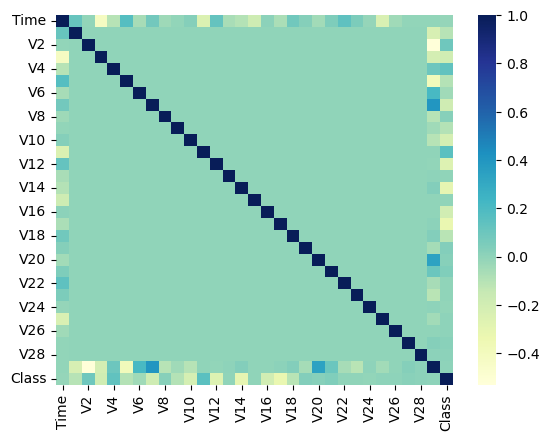

In [7]:
# Checking corelation of data
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu") 
# displaying heatmap 
plt.show() 

In [8]:
# Since it is not a Time series problem
data.drop("Time",axis=1,inplace=True)

In [9]:
#Checking unique values
data.nunique()

V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

0    284315
1       492
Name: Class, dtype: int64

0 ==>> Legal Transaction
1 ==>> Fraudit Transaction




Text(0.5, 1.0, 'Distribution of Data')

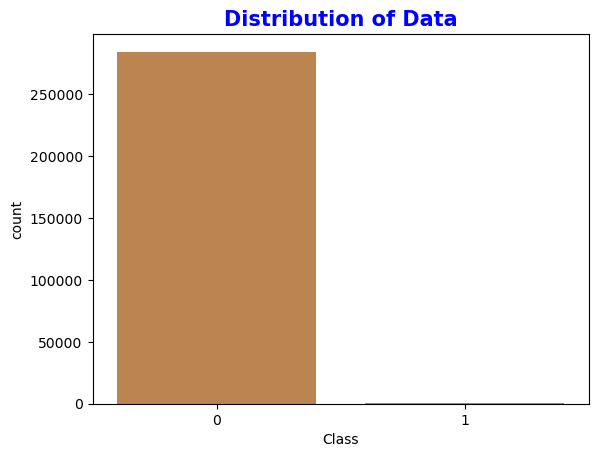

In [10]:
#Cehck distribution of data
print(data['Class'].value_counts())
print("\n0 ==>> Legal Transaction\n1 ==>> Fraudit Transaction")
print("\n")
sns.countplot(x='Class',data=data,color='peru')
plt.title("Distribution of Data",color='b',fontdict={'size': 15, 'weight': 'bold'})

In [11]:
# Expressing the Distribution in the form of percentage
print((data['Class'].value_counts()/284807)*100)

0    99.827251
1     0.172749
Name: Class, dtype: float64


It shows that out datasetis highly imbalaced. Here 99% of data is legally transacted only 0.1% is illegal transaction.

Since dataset is very imbalanced

In [12]:
#Feature Extraction
X= data.drop("Class",axis=1)
y= data["Class"]

This is imbalanced datasets where one class has significantly fewer instances than others. To overcome this problem we'll use SMOTE technique. SMOTE creates synthetic minority class samples to balance the classes, potentially improving model performance

In [13]:
#SMOTE Technique
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 284315})


To rescale the values of a numerical feature between two variables;we use MinMaxScalar

In [14]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [15]:
#split the training & test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X.shape,X_train.shape,X_test.shape)

(568630, 29) (454904, 29) (113726, 29)


 # MODEL TRAINING

In [16]:
#Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


# MODEL EVALUATION

In [17]:
#Accuracy on trainig data
X_train_pred=model.predict(X_train)
train_acc=accuracy_score(X_train_pred,y_train)
print("Accuracy of Trainig data: ",train_acc)

Accuracy of Trainig data:  0.9567051509769094


[[223937   3741]
 [ 15954 211272]]


Text(0.5, 1.0, 'Confusion Matrix of Train data')

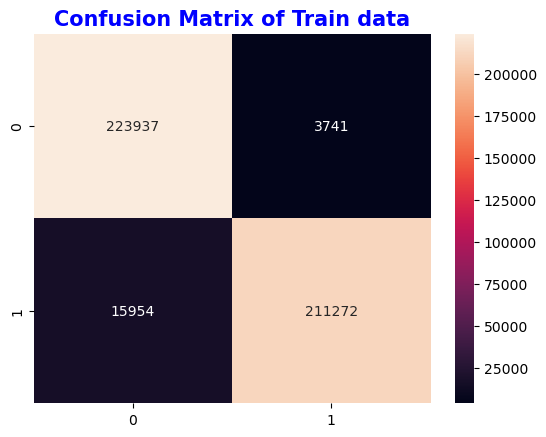

In [18]:
# Drawing Confusion Matrix of train dataset
cf_matrix = confusion_matrix(y_train, X_train_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True,cmap="rocket",fmt='d')
plt.title("Confusion Matrix of Train data",color='b',fontdict={'size': 15, 'weight': 'bold'})

In [19]:
#Accuracy on test data
X_test_pred=model.predict(X_test)
test_acc=accuracy_score(X_test_pred,y_test)
print("Accuracy of Trainig data: ",test_acc)

Accuracy of Trainig data:  0.9564743330460932


[[55711   926]
 [ 4024 53065]]


Text(0.5, 1.0, 'Confusion Matrix of Test data')

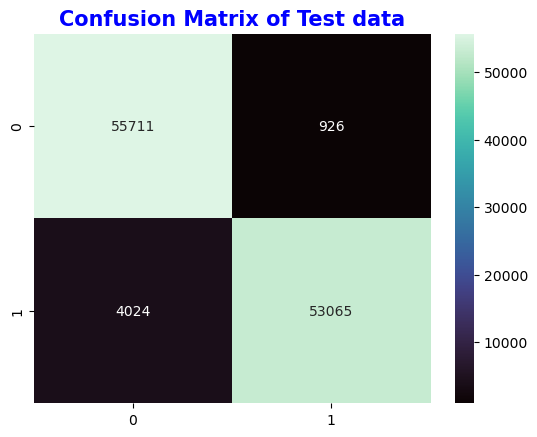

In [20]:
# Drawing Confusion Matrix of test dataset
cf_matrix = confusion_matrix(y_test, X_test_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True,cmap="mako",fmt='d')
plt.title("Confusion Matrix of Test data",color='b',fontdict={'size': 15, 'weight': 'bold'})

In [21]:
# Overall report of data
matrix=classification_report(y_test,X_test_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     56637
           1       0.98      0.93      0.96     57089

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

